# Redes neuronales de tipo Feed Forward
**Inteligencia artificial** <br>
**Hoja de trabajo no. 2** <br>
Diego Sevilla <br>
17238

### Se importan librerias

In [1]:
import numpy as np # para operaciones con matrices y vectores
import pandas as pd 
from scipy import optimize as op
from numpy import genfromtxt # para obetener los datos
from matplotlib import pyplot as plt # para graficar
from matplotlib import image as mp_img # para las imagenes
from PIL import Image # pillow para manejor de imagenes

from AlgoritmoRN import *
import time

Datasets adquiridos de: https://www.kaggle.com/zalando-research/fashionmnist#fashion-mnist_test.csv <br>
### Se cargan los data_sets: 

In [2]:
##train_data = genfromtxt('fashion-mnist_train.csv', delimiter=',')
train_data = pd.read_csv('fashion-mnist_train.csv')
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
##test_data = genfromtxt('fashion-mnist_test.csv', delimiter=',')
test_data = pd.read_csv('fashion-mnist_test.csv')
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Organizacion de los datos

**Normalizacion de los datos**

In [4]:
NORMALIZADOR = 1000.0

#### Vector X

In [5]:
x_tr = train_data.iloc[:, 1:] / NORMALIZADOR
rows_tr, cols_tr = x_tr.shape

In [6]:
print( x_tr.shape )

(60000, 784)


In [7]:
x_tr

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.005,0.0,0.0,...,0.000,0.000,0.000,0.030,0.043,0.000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.001,0.002,0.0,0.0,0.000,0.0,0.0,...,0.003,0.000,0.000,0.000,0.000,0.001,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,...,0.073,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,...,0.160,0.162,0.163,0.135,0.094,0.000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0


In [8]:
x_t = test_data.iloc[:, 1:] / NORMALIZADOR
rows_t, cols_t = x_t.shape

In [9]:
print( x_t.shape )

(10000, 784)


In [10]:
x_t

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.009,0.008,0.000,...,0.103,0.087,0.056,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.034,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2,0.0,0.000,0.000,0.0,0.0,0.0,0.014,0.053,0.099,0.017,...,0.000,0.000,0.000,0.000,0.063,0.053,0.031,0.000,0.000,0.0
3,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.161,...,0.137,0.126,0.140,0.000,0.133,0.224,0.222,0.056,0.000,0.0
4,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.037,...,0.032,0.023,0.014,0.020,0.000,0.000,0.001,0.000,0.000,0.0
9996,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.002,0.052,0.023,0.028,0.000,0.000,0.0
9997,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.175,0.172,0.172,0.182,0.199,0.222,0.042,0.000,0.001,0.0
9998,0.0,0.001,0.003,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.0


In [11]:
X = np.vstack((
    x_tr,
    x_t
))
rows, cols = X.shape

In [12]:
print( X.shape )

(70000, 784)


In [13]:
print(X)

[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.001 0.   ]
 [0.    0.001 0.003 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


In [14]:
print(np.asarray(train_data.iloc[:, 0]))

[2 9 6 ... 8 8 7]


#### Vector Y

In [15]:
y_tr = np.asarray(train_data.iloc[:, 0])
print(y_tr)

[2 9 6 ... 8 8 7]


In [16]:
y_tr = y_tr.reshape(rows_tr,1)
print(y_tr)

[[2]
 [9]
 [6]
 ...
 [8]
 [8]
 [7]]


In [17]:
#Se repiten pasos para los datos de prueba
y_t = np.asarray(test_data.iloc[:, 0])
y_t = y_t.reshape(rows_t,1)

In [18]:
y = np.vstack((
    y_tr,
    y_t
))
print(y)

[[2]
 [9]
 [6]
 ...
 [8]
 [8]
 [1]]


In [19]:
y = y.reshape(rows, 1)
print(y)

[[2]
 [9]
 [6]
 ...
 [8]
 [8]
 [1]]


In [20]:
# Matriz de categorizacion
Y = (y == np.array(range(10))).astype(int)

In [21]:
print(y)

[[2]
 [9]
 [6]
 ...
 [8]
 [8]
 [1]]


In [22]:
print(Y)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]


### Red neural Feed Forward

**Definicion de entradas de red neuronal, obtencion de shapes de theta y aplanacion de matrices**

In [23]:
# Estructura de la red neuronal
# 785 neuronas de entrada
# 130 neuronoas ocultas
# 10 neuronas de salida

NETWORK_ARCHITECTURE = np.array([
    cols,
    130,
    10
])
print(NETWORK_ARCHITECTURE)

[784 130  10]


In [24]:
# Funcion para los shapes de las thetas
theta_shapes = np.hstack((
    NETWORK_ARCHITECTURE[1:].reshape(len(NETWORK_ARCHITECTURE) - 1, 1),
    (NETWORK_ARCHITECTURE[:-1] + 1).reshape(len(NETWORK_ARCHITECTURE) - 1, 1)
))
print(theta_shapes)

[[130 785]
 [ 10 131]]


In [25]:
# Convierte la matriz a un array de thetas
flat_thetas = flatten_list_of_arrays([
    np.random.rand(*theta_shape)
    for theta_shape in theta_shapes
])
print(flat_thetas)

[0.24050014 0.13621512 0.27361992 ... 0.8926729  0.02422549 0.85308278]


**Proceso de entramiento y optimizacion**

In [ ]:
# Optimizacion para encontrar thetas
print("\n Optimizando ..... \n")
result = op.minimize(
    fun = cost_function,
    x0 = flat_thetas,
    args = (theta_shapes, X, Y),
    method = 'L-BFGS-B',
    jac = back_propagation,
    options = {'disp': True, 'maxiter': 3000}
)
print("\n Fin de optimizacion ..... \n")

In [ ]:
np.savetxt('optimizacion_thetas.txt', result.x)

### Resultados

In [26]:
#xx_t = test_data.iloc[:, 1:] / NORMALIZADOR
#xx_t
x_t

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.009,0.008,0.000,...,0.103,0.087,0.056,0.000,0.000,0.000,0.000,0.000,0.000,0.0
1,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.034,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
2,0.0,0.000,0.000,0.0,0.0,0.0,0.014,0.053,0.099,0.017,...,0.000,0.000,0.000,0.000,0.063,0.053,0.031,0.000,0.000,0.0
3,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.161,...,0.137,0.126,0.140,0.000,0.133,0.224,0.222,0.056,0.000,0.0
4,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.037,...,0.032,0.023,0.014,0.020,0.000,0.000,0.001,0.000,0.000,0.0
9996,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.002,0.052,0.023,0.028,0.000,0.000,0.0
9997,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.175,0.172,0.172,0.182,0.199,0.222,0.042,0.000,0.001,0.0
9998,0.0,0.001,0.003,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.0


In [27]:
yy_t = np.asarray(test_data.iloc[:, 0]).reshape(x_t.shape[0], 1)
print(yy_t)

[[0]
 [1]
 [2]
 ...
 [8]
 [8]
 [1]]


In [28]:
flat_thetas_optimizado = np.loadtxt("optimizacion_thetas.txt")
print(flat_thetas_optimizado)

[-1.39266122  0.13241407  0.11505313 ... -3.63873056 -0.01392915
 -0.71609191]


In [29]:
# Array de thetas  ---->  matriz de thetas
thetas_finales = inflate_matrixes(flat_thetas_optimizado, theta_shapes)
print(thetas_finales)

[array([[-1.39266122,  0.13241407,  0.11505313, ...,  0.79858778,
         0.97076001,  0.77034742],
       [ 0.14334492,  0.2161486 ,  0.13896807, ...,  0.99350656,
         0.63469525,  0.14420377],
       [ 0.16587367,  0.15782914,  0.66921972, ...,  0.92938747,
         0.94384125,  0.44544764],
       ...,
       [ 0.76605008,  0.02322101,  0.39240928, ...,  0.97538151,
         0.57966917,  0.5503997 ],
       [-0.31230043,  0.9591695 ,  0.25669842, ...,  0.83162308,
         0.55809557,  0.39064459],
       [ 2.29350855,  0.56923861,  0.79108819, ...,  0.86521125,
         0.85078974,  0.09194285]]), array([[-0.17711438, -0.71704833, -0.2552498 , ..., -3.86666932,
        -0.47828153, -0.68895695],
       [-1.11322834,  0.31582684, -0.51018321, ..., -6.69363187,
        -0.15254721, -0.17413979],
       [-0.8129529 , -0.20751342,  0.03358697, ...,  5.09207616,
        -0.14102382, -0.47823495],
       ...,
       [-0.48897372, -0.0628244 , -0.04650482, ..., -2.97447523,
        

In [30]:
# algoritmo feed forward para obtener prediccion
a = feed_forward(thetas_finales, x_t)
# indices del porcentaje mas alto
maxvalues = np.argmax(a[-1], axis = 1)
print(maxvalues)

[0 1 2 ... 8 8 2]


In [31]:
a[-1]

array([[7.66866737e-01, 3.08202933e-04, 5.90187822e-03, ...,
        4.25942839e-10, 1.70009947e-03, 2.18305025e-18],
       [2.22420554e-03, 9.98152219e-01, 5.64208086e-04, ...,
        4.88176041e-11, 2.70203788e-07, 3.90944357e-09],
       [5.03966216e-03, 9.13709928e-03, 9.62802144e-01, ...,
        2.06173811e-13, 3.41704828e-03, 5.54031126e-15],
       ...,
       [4.92758445e-04, 6.24521277e-09, 1.72832898e-03, ...,
        7.12924748e-06, 9.98187882e-01, 1.04335780e-04],
       [1.24531701e-03, 9.21746226e-11, 8.15149513e-05, ...,
        1.86356310e-04, 9.96156755e-01, 4.39429370e-07],
       [9.42180585e-04, 1.12239670e-01, 4.93703385e-01, ...,
        1.94286894e-13, 1.24236744e-03, 8.62497730e-13]])

In [32]:
yy_t

array([[0],
       [1],
       [2],
       ...,
       [8],
       [8],
       [1]], dtype=int64)

In [33]:
exito = 0
for i in range(len(a[-1])):
    if (maxvalues[i] == yy_t[i][0]):
        exito += 1
        
print("Se obtuvo un %",exito * 100/len(a[-1]),"de exito.")

Se obtuvo un % 88.31 de exito.


### Imagenes

In [34]:
def PixelsMatrix(pixels, size):
    pixelsTuple = [(x, x, x) for x in pixels]
    return np.asarray(pixelsTuple).reshape(size, size, 3)

cnt = np.random.randint(0, len(a[-1]))
desicion = 0
prueba = 0

xx_t = test_data.iloc[:, 1:]

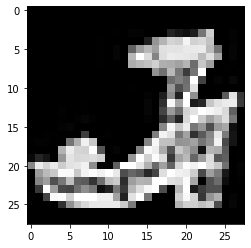

Prediccion: Sandal
Dato real: Sandal
Prueba no.  1

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


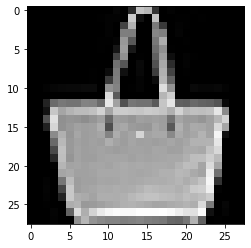

Prediccion: Bag
Dato real: Bag
Prueba no.  2

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


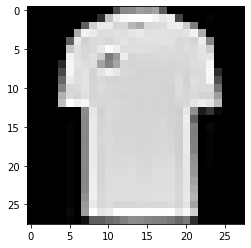

Prediccion: T-shirt/top
Dato real: T-shirt/top
Prueba no.  3

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


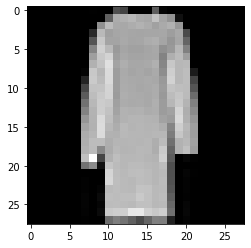

Prediccion: Coat
Dato real: Dress
Prueba no.  4

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


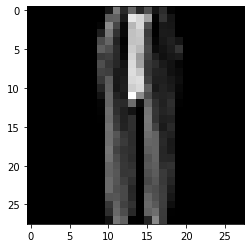

Prediccion: Trouser
Dato real: Trouser
Prueba no.  5

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


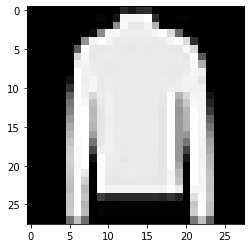

Prediccion: Pullover
Dato real: Pullover
Prueba no.  6

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


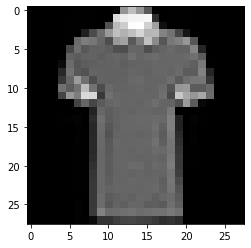

Prediccion: T-shirt/top
Dato real: T-shirt/top
Prueba no.  7

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


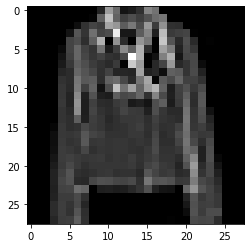

Prediccion: Pullover
Dato real: Coat
Prueba no.  8

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


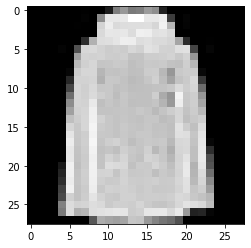

Prediccion: Coat
Dato real: Coat
Prueba no.  9

1. Continuar con la prediccion
2. Pare ya, no mas predicciones!!
1


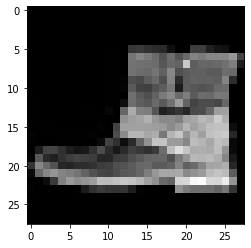

Prediccion: Ankle boot
Dato real: Ankle boot
Prueba no.  10


In [ ]:
while desicion != "2" and cnt < len(a[-1]):
    pixels = PixelsMatrix(xx_t.values[cnt], 28)
    # Convert the pixels into an array using numpy
    array = np.array(pixels, dtype=np.uint8)
    
    # Use PIL to create an image from the new array of pixels
    new_image = Image.fromarray(array)
    
    new_image.save('testimg.png')
    img = mp_img.imread('testimg.png')
    imgplot = plt.imshow(img)
    plt.show()
    
    print("Prediccion: " + mnist[maxvalues[cnt]])
    print("Dato real: " + mnist[yy_t[cnt][0]])
    print("Prueba no. ",prueba)
    
    prueba += 1
    cnt += 1
    desicion = input("\n1. Continuar con la prediccion\n2. Pare ya, no mas predicciones!!\n")

Con estas 10 pruebas se observan 2 fallos lo que indica un aproximado del 80 porciento de exito para la prediccion.

#### Conclusiones

 - Se observa una prediccion aceptable de las distintas prendas de ropa. 
 - Las fallas en predicciones se deben a que algunas prendas se parecen mucho entre si y/o no tienen una forma bien definida que puede ser confuza incluso para una persona vea la prenda. Sin embargo, esto tambien indica que se puede descartar la posibilidad de un modelo con overfiting.

**Referencias:** <br>
- https://dzone.com/articles/the-very-basic-introduction-to-feed-forward-neural
- https://mlfromscratch.com/neural-networks-explained/#/ <br>
- https://www.youtube.com/watch?v=tIeHLnjs5U8 <br>
- https://stackoverflow.com/questions/46923244/how-to-create-image-from-a-list-of-pixel-values-in-python3/46924413 <br>
**Clases en linea de Samuel.